In [40]:
import statsmodels
from statsmodels.tsa.api import VAR
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
dat = pd.read_csv('var_data_230916.csv')

In [64]:
dat.columns = ['month', 'UNE', 'IND','RET','ESI']

In [65]:
dat.dtypes

month     object
UNE      float64
IND      float64
RET      float64
ESI      float64
dtype: object

In [66]:
dat.index = pd.PeriodIndex(dat.month, freq='M')

In [67]:
dat

,month,UNE,IND,RET,ESI
month,,,,,
2005-01,2005/01,8.6,3.2,-3.0,-3.9
2005-02,2005/02,2.8,1.4,-1.3,-2.3
2005-03,2005/03,2.8,3.5,2.8,-0.5
2005-04,2005/04,2.8,2.1,3.1,1.5
2005-05,2005/05,0.0,2.3,3.8,3.4
...,...,...,...,...,...
2022-08,2022/08,-18.8,5.4,1.9,-7.4
2022-09,2022/09,-6.7,4.3,-2.3,-9.0
2022-10,2022/10,-12.5,2.8,-1.6,-10.4


In [68]:
dat.drop('month', axis=1, inplace=True)
dat

,UNE,IND,RET,ESI
month,,,,
2005-01,8.6,3.2,-3.0,-3.9
2005-02,2.8,1.4,-1.3,-2.3
2005-03,2.8,3.5,2.8,-0.5
2005-04,2.8,2.1,3.1,1.5
2005-05,0.0,2.3,3.8,3.4
...,...,...,...,...
2022-08,-18.8,5.4,1.9,-7.4
2022-09,-6.7,4.3,-2.3,-9.0
2022-10,-12.5,2.8,-1.6,-10.4


In [69]:
mod = smf.ols(formula='RET ~ ESI', data=dat)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                    RET   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           3.36e-24
Time:                        04:56:36   Log-Likelihood:                -509.44
No. Observations:                 216   AIC:                             1023.
Df Residuals:                     214   BIC:                             1030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9059      0.175     16.575      0.0

In [105]:
import statsmodels.api as sma
ols = sma.OLS(dat['IND'], dat[['UNE', 'RET', 'ESI']])
ols_result = ols.fit()
print(ols_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    IND   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              194.0
Date:                Sat, 16 Sep 2023   Prob (F-statistic):                    1.20e-60
Time:                        05:22:04   Log-Likelihood:                         -483.22
No. Observations:                 216   AIC:                                      972.4
Df Residuals:                     213   BIC:                                      982.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

TypeError: ignored

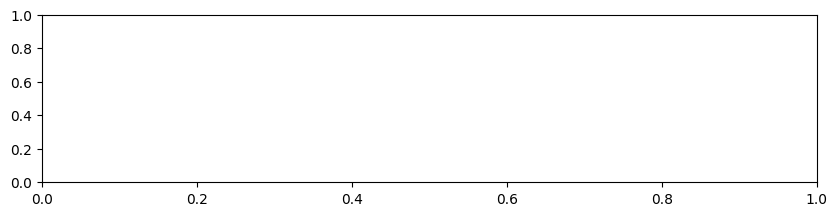

In [106]:
results.plot()

In [80]:
results = model.fit(maxlags=15, ic='aic')

In [81]:
print(results.k_ar)

14


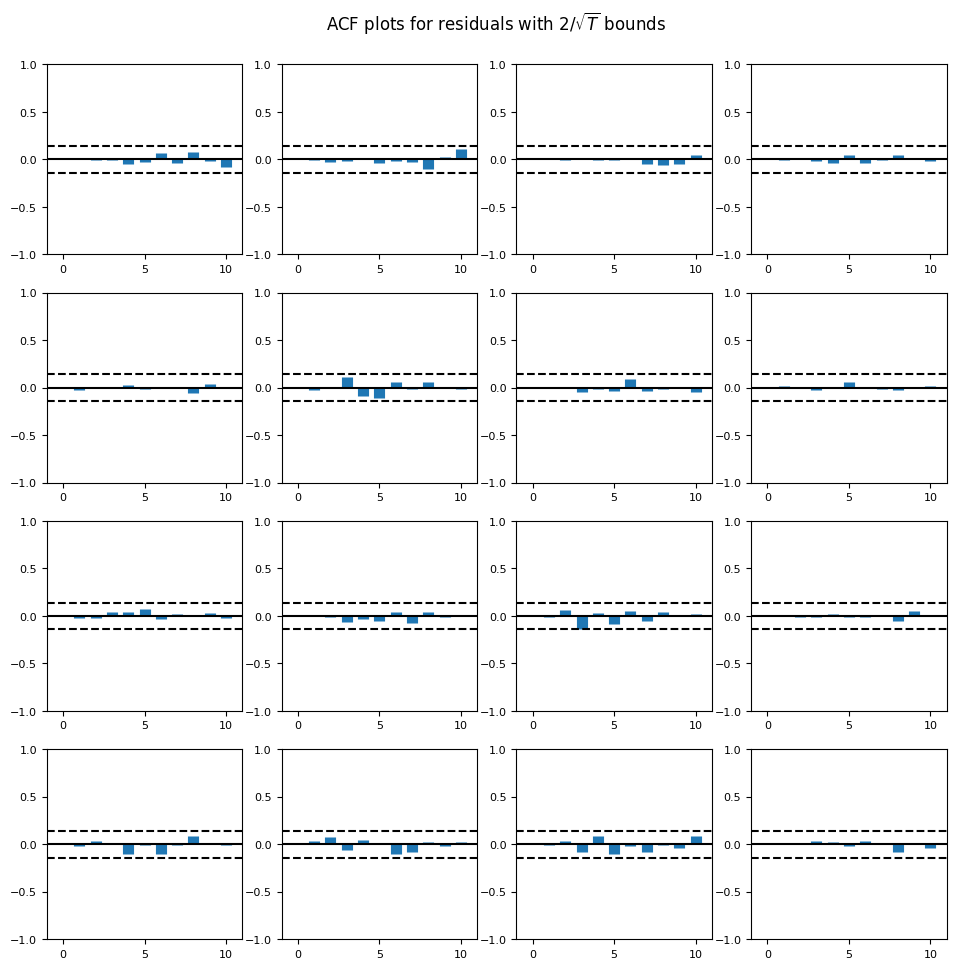

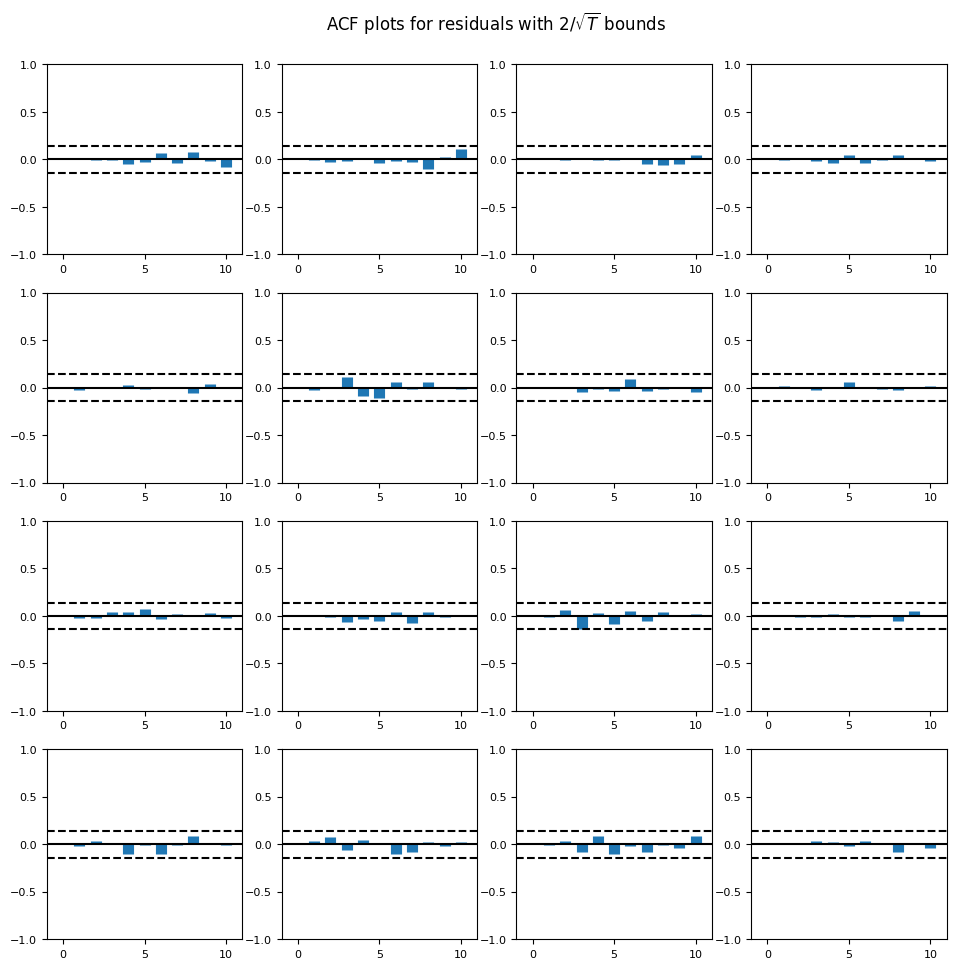

In [85]:
# auto-correlation
results.plot_acorr()

In [86]:
results.forecast(dat.values, 24)

array([[ -5.74889459,  -1.62129579,  -2.00062152, -12.88325394],
       [  0.84064482,   0.68507017,  -1.21913691, -13.18327372],
       [  5.89484941,  -0.36827689,  -3.02853842, -13.41628176],
       [ 11.27340635,  -1.63377802,  -2.48483823, -13.65771322],
       [ 11.04654297,  -1.30212663,  -1.71201409, -13.61393046],
       [ 15.22918817,  -2.04828896,  -2.4029932 , -13.05032908],
       [ 11.88182496,  -2.64663852,  -0.64341286, -11.61447859],
       [ 15.08898044,  -1.91784501,  -2.69716538,  -9.114666  ],
       [ 15.8141618 ,  -0.25583614,   1.90921282,  -5.67076323],
       [ 17.73388377,  -0.51393746,   0.57989441,  -1.5982778 ],
       [ 17.31676611,   1.84033376,   2.29303216,   2.6747064 ],
       [ 24.06041108,   1.74932553,   2.16880274,   6.64485513],
       [ 20.35145059,   2.53573423,   2.14663482,  10.05286574],
       [ 16.22551201,   2.00555792,   2.84267001,  12.76468339],
       [ 15.47209473,   2.03951087,   4.15745464,  14.82496303],
       [ 10.17519266,   3

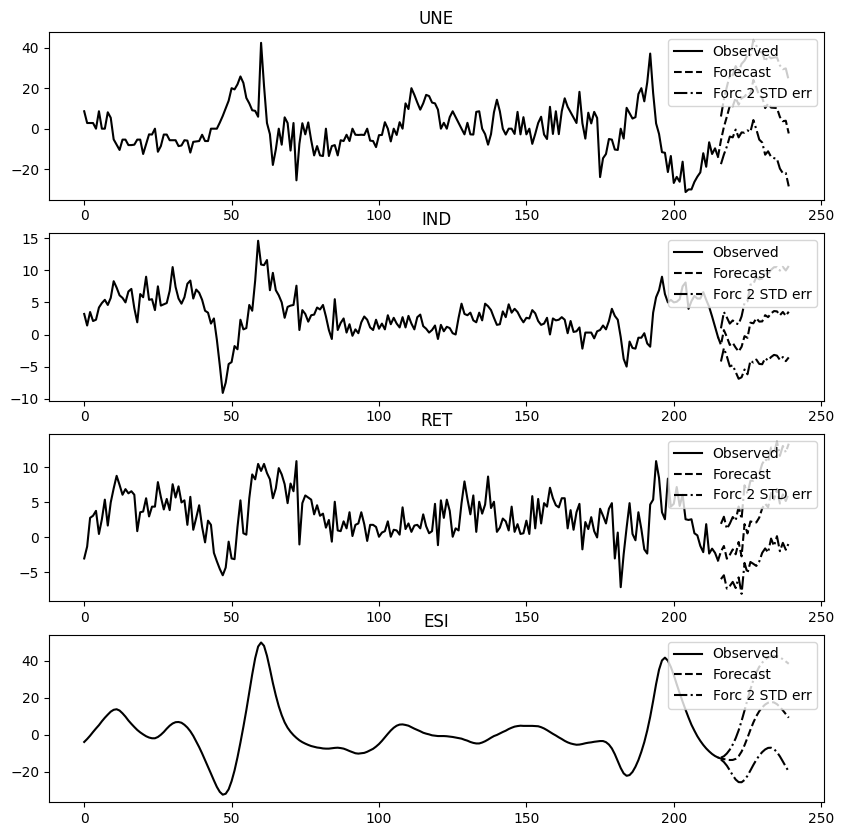

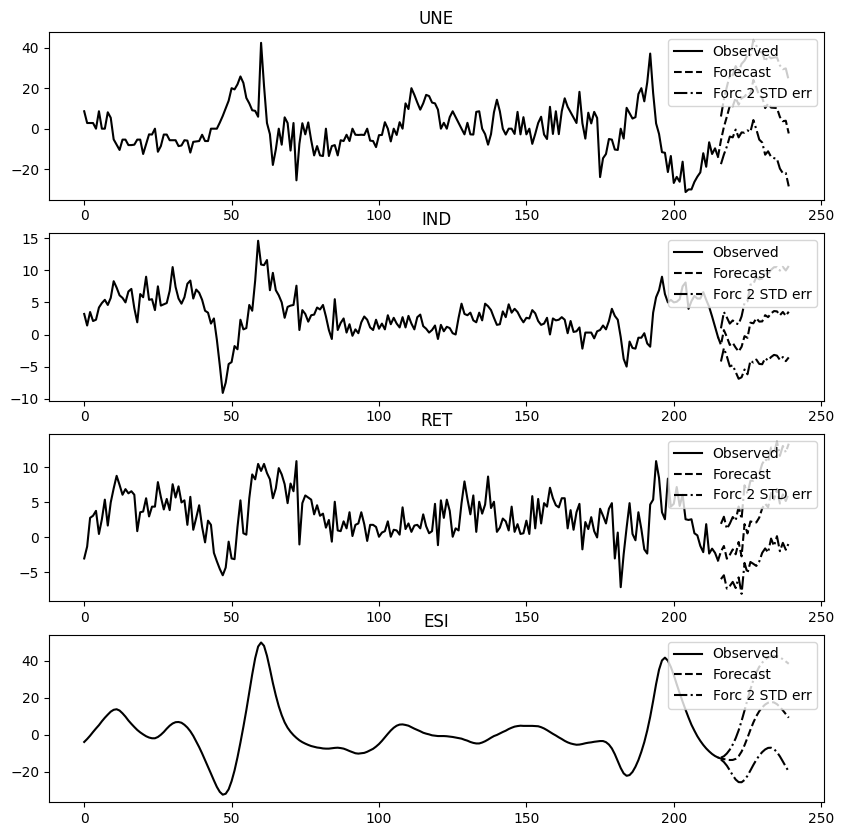

In [89]:
results.plot_forecast(24)

In [90]:
# 충격 반응 함수를 사용한 충격 반응 살펴보기
irf = results.irf(24)

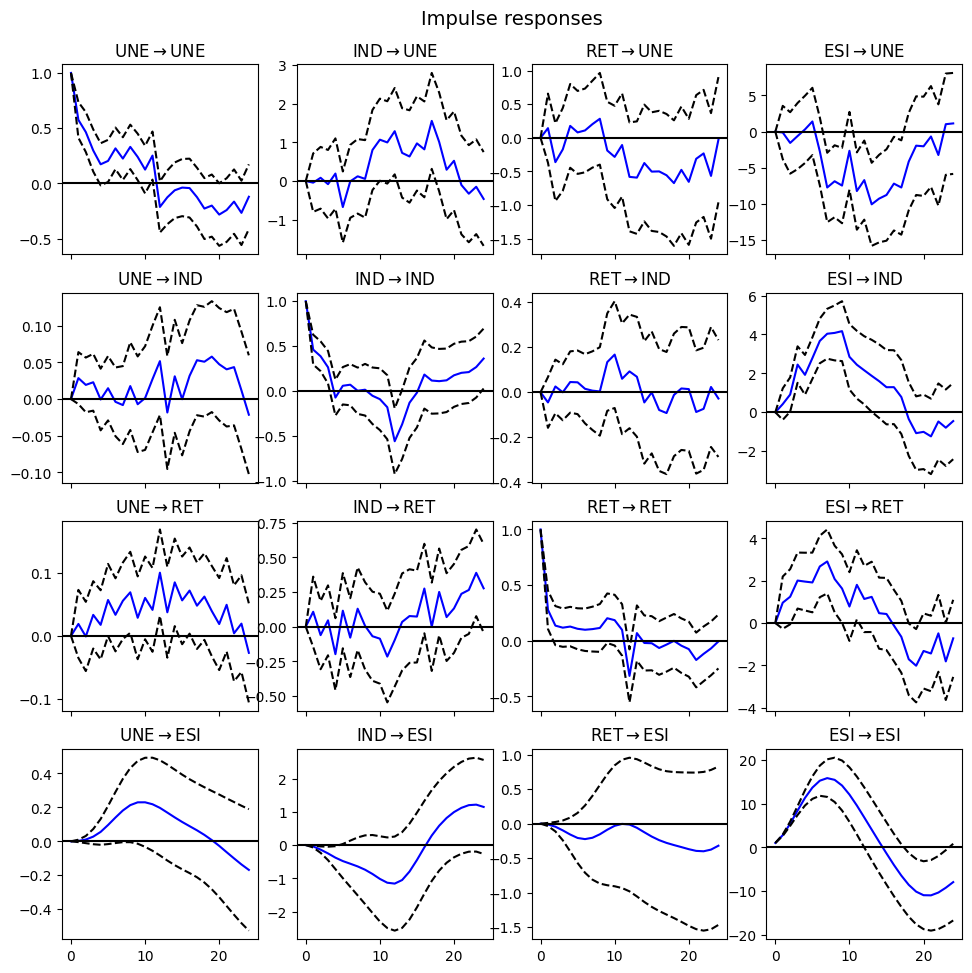

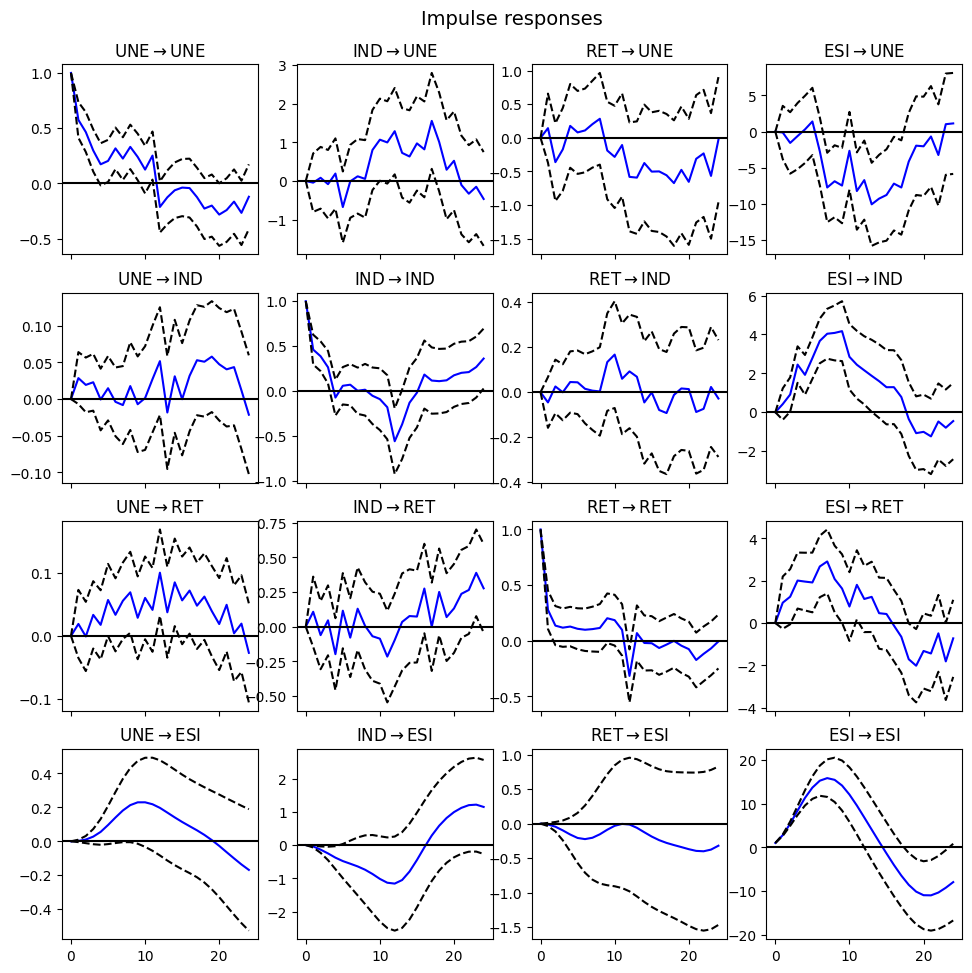

In [91]:
# reduced form
irf.plot(orth=False)

In [92]:
# 그래프의 파란선이 실제 추정치, 위아래는 신뢰구간
# 신뢰구간의 안에 있으면 사실상 0에 가깝다고 봐야함
# 가장 우측 아래의 ESI->ESI의 경우 첫 12개월(상반기)은 0 초과의 변화가 발생한다고 봐야함

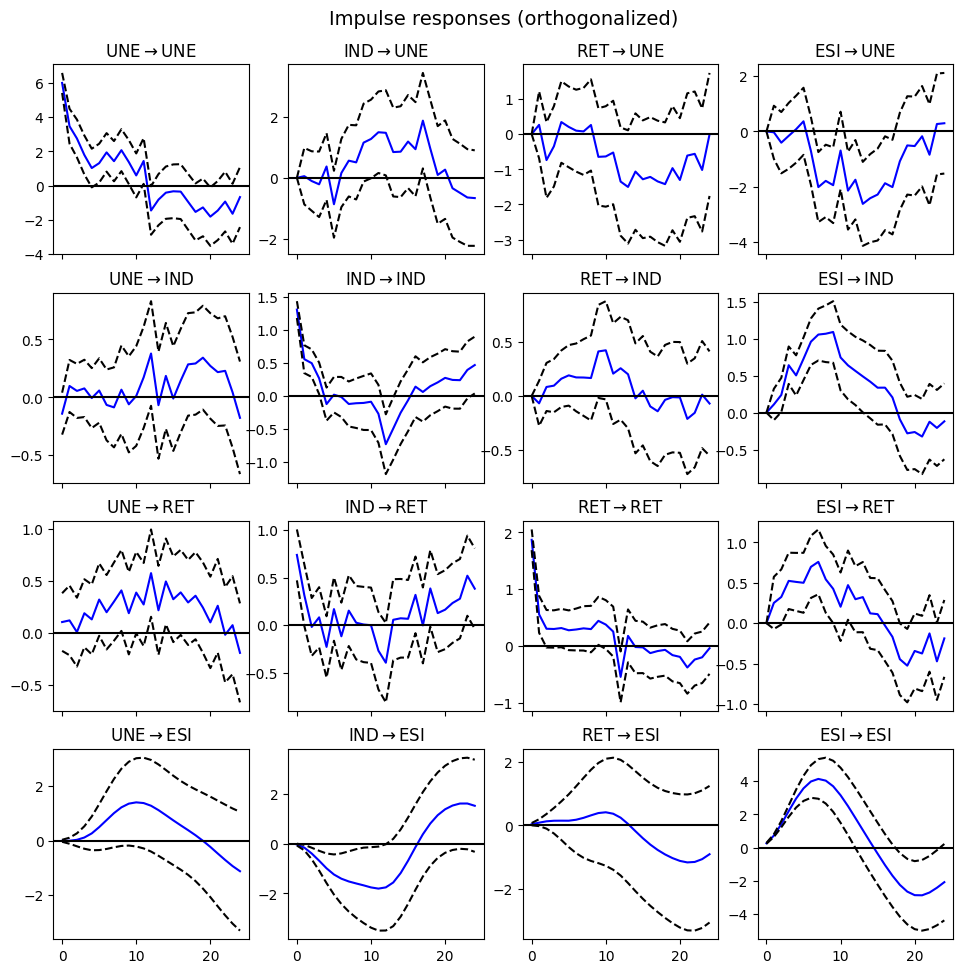

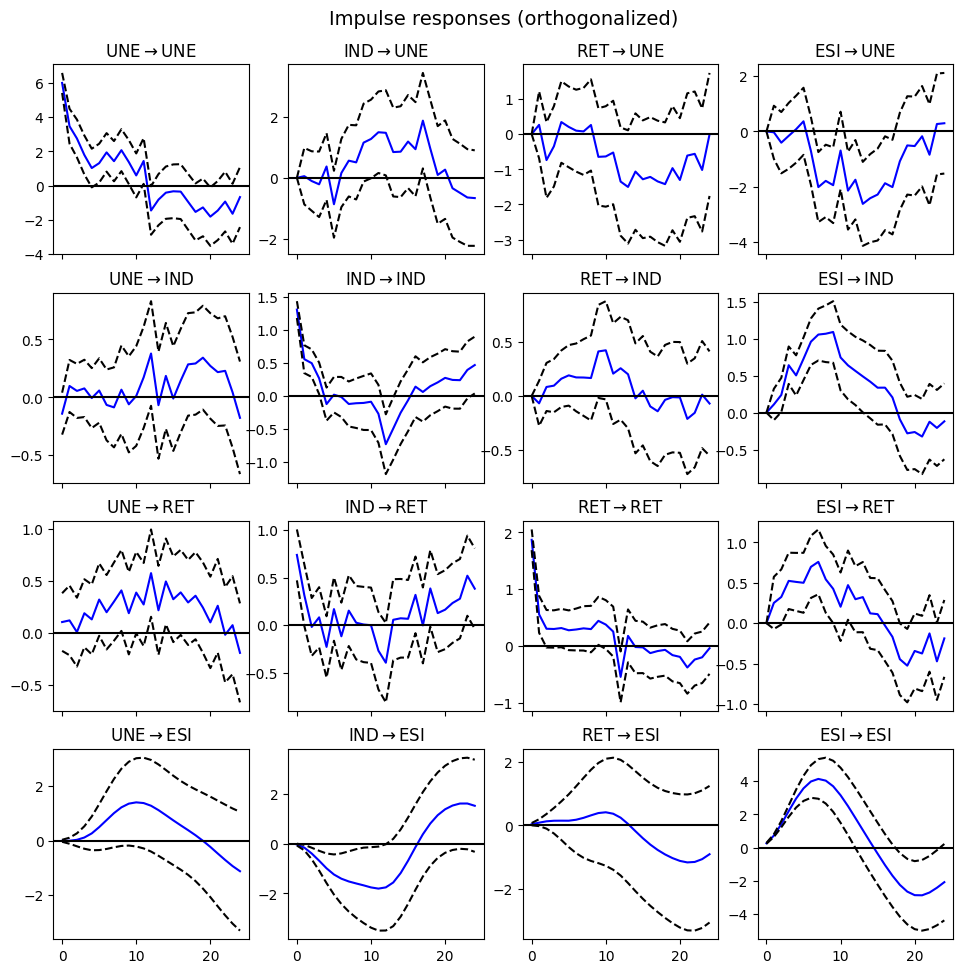

In [93]:
# structural form
irf.plot(orth=True)

In [95]:
# 기존 연구에 따라서 외생적 -> 내생적으로 정렬
# VAR은 열의 순서에 따라서 결과값이 달라지기 때문
dat = dat[['IND', 'UNE', 'RET', 'ESI']]

In [96]:
model = VAR(dat)

In [97]:
results = model.fit(maxlags = 4, ic = 'aic')

In [99]:
irf = results.irf(24)

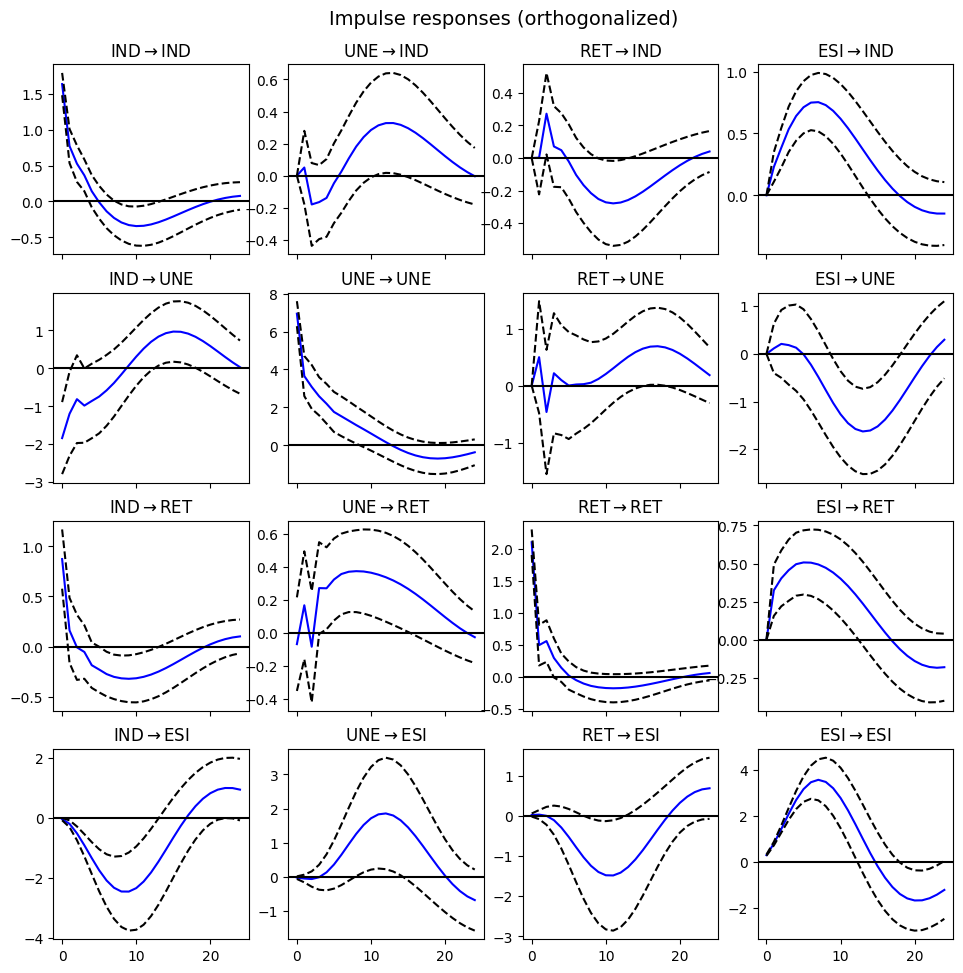

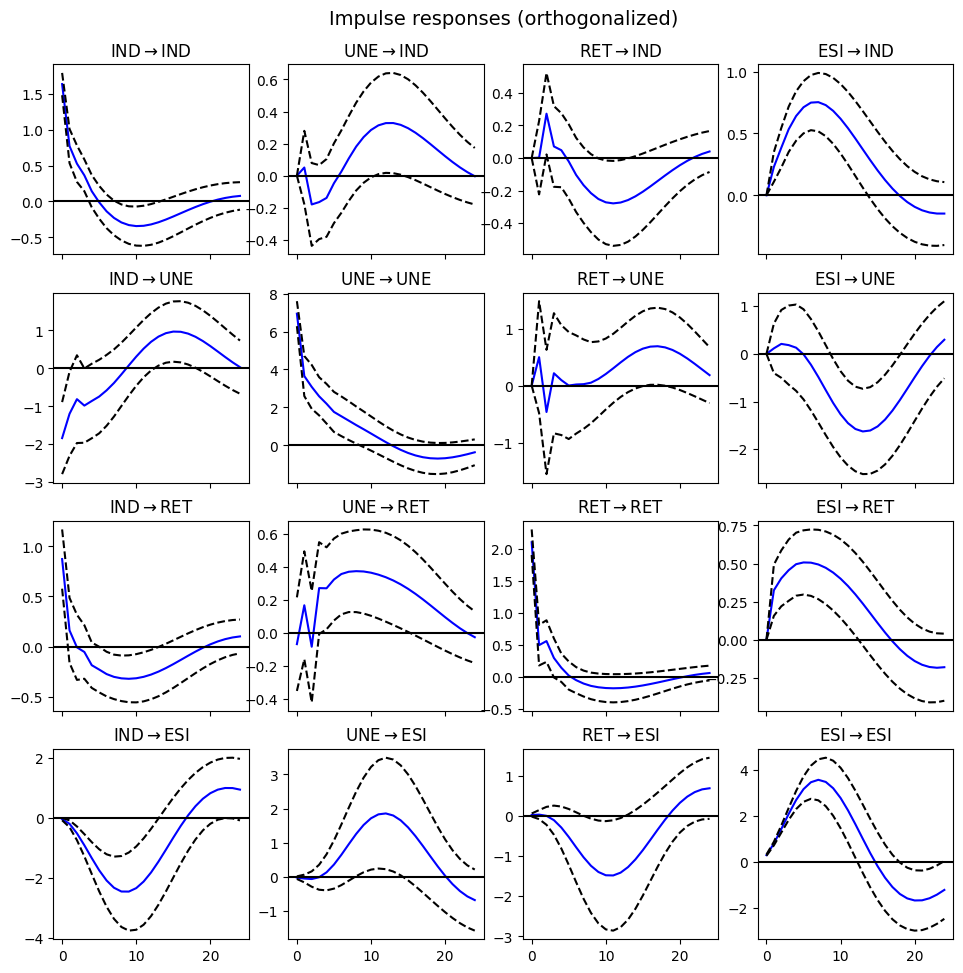

In [100]:
irf.plot(orth=True)

### 분산분해

In [101]:
fevd = results.fevd(6)

In [102]:
fevd.summary()

FEVD for IND
          IND       UNE       RET       ESI
0    1.000000  0.000000  0.000000  0.000000
1    0.983396  0.000782  0.000002  0.015821
2    0.919857  0.009000  0.019224  0.051919
3    0.854584  0.014350  0.018393  0.112673
4    0.777671  0.017018  0.017130  0.188182
5    0.702570  0.015794  0.015557  0.266079

FEVD for UNE
          IND       UNE       RET       ESI
0    0.065499  0.934501  0.000000  0.000000
1    0.072261  0.923797  0.003742  0.000201
2    0.071046  0.922198  0.006013  0.000744
3    0.075939  0.916966  0.006019  0.001076
4    0.079447  0.913607  0.005750  0.001196
5    0.082246  0.911077  0.005527  0.001151

FEVD for RET
          IND       UNE       RET       ESI
0    0.146034  0.000852  0.853114  0.000000
1    0.140095  0.005858  0.835320  0.018727
2    0.129008  0.006503  0.820709  0.043780
3    0.122013  0.017607  0.786996  0.073384
4    0.120364  0.027402  0.747049  0.105184
5    0.120682  0.040330  0.704463  0.134524

FEVD for ESI
          IND       U

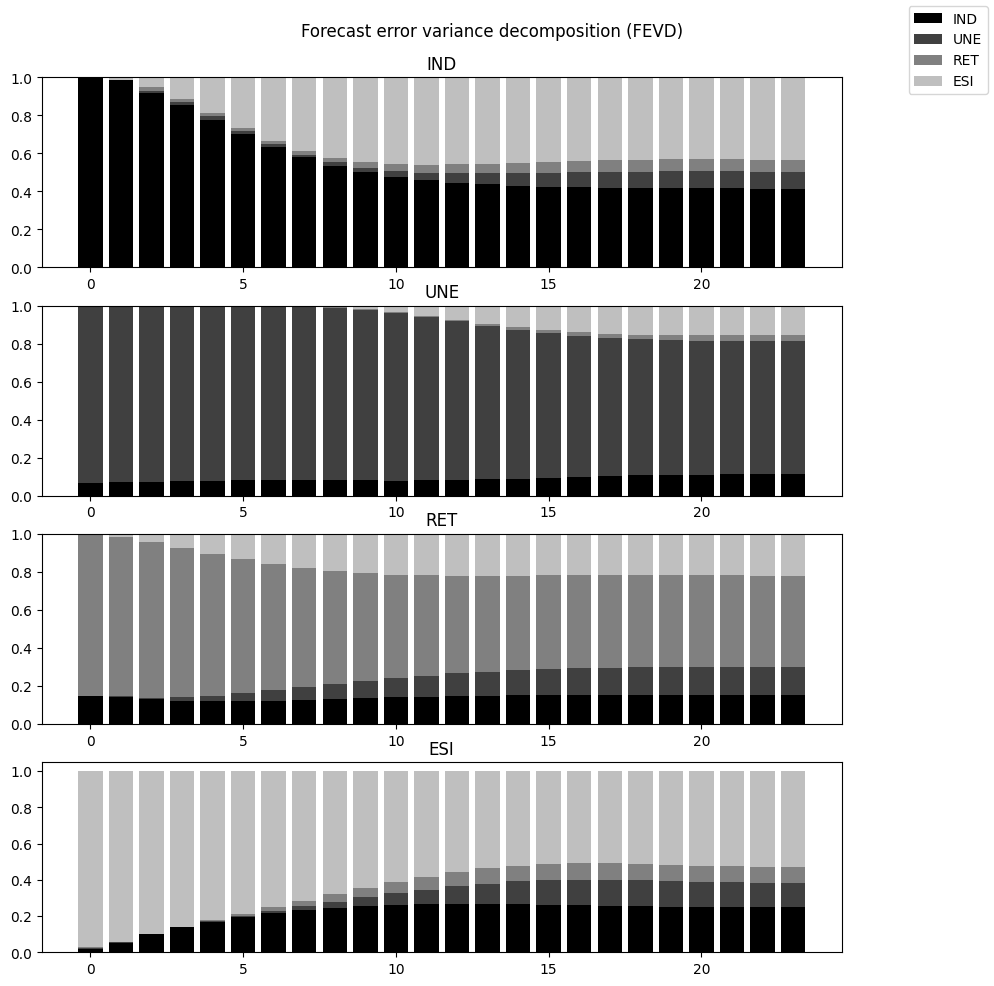

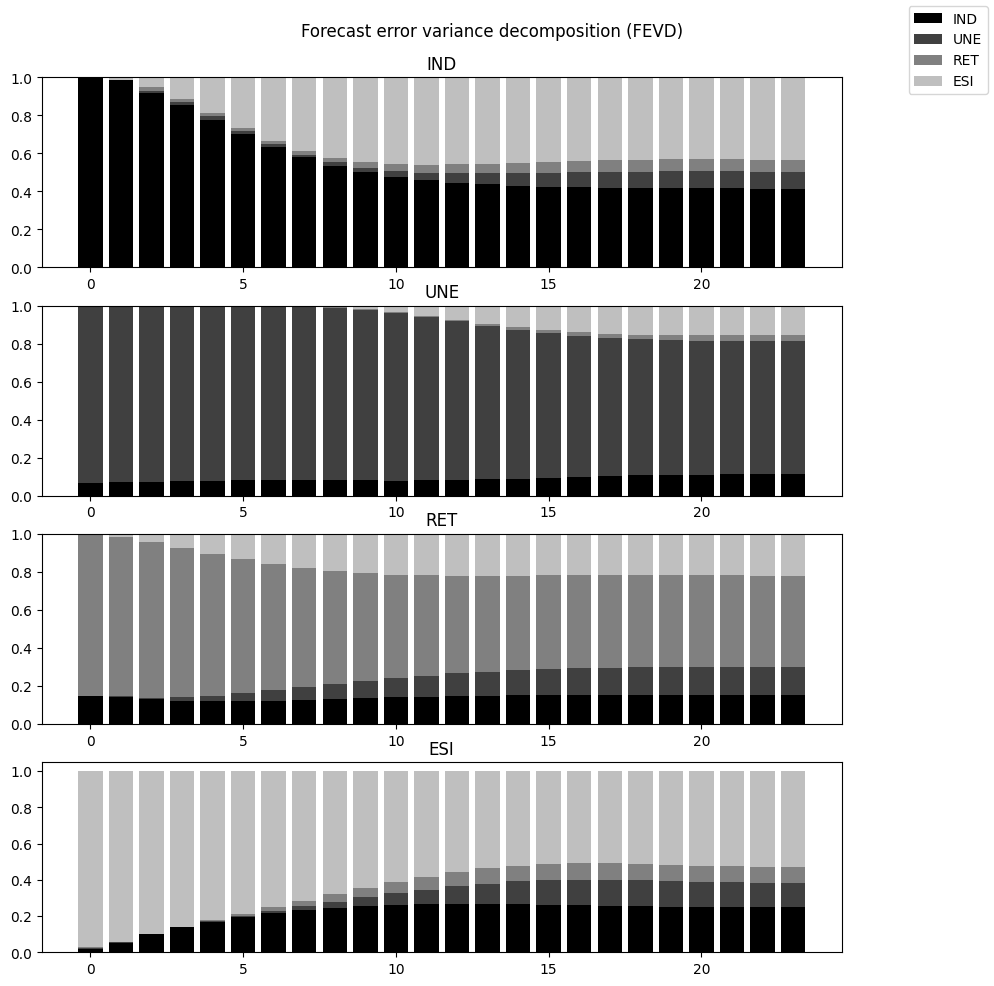

In [103]:
results.fevd(24).plot()